<a href="https://colab.research.google.com/github/aevelynr/StudentOutcomes/blob/main/Student_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("student_data.csv")
df = data.copy()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# EDA

In [7]:
# Continuous variables
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


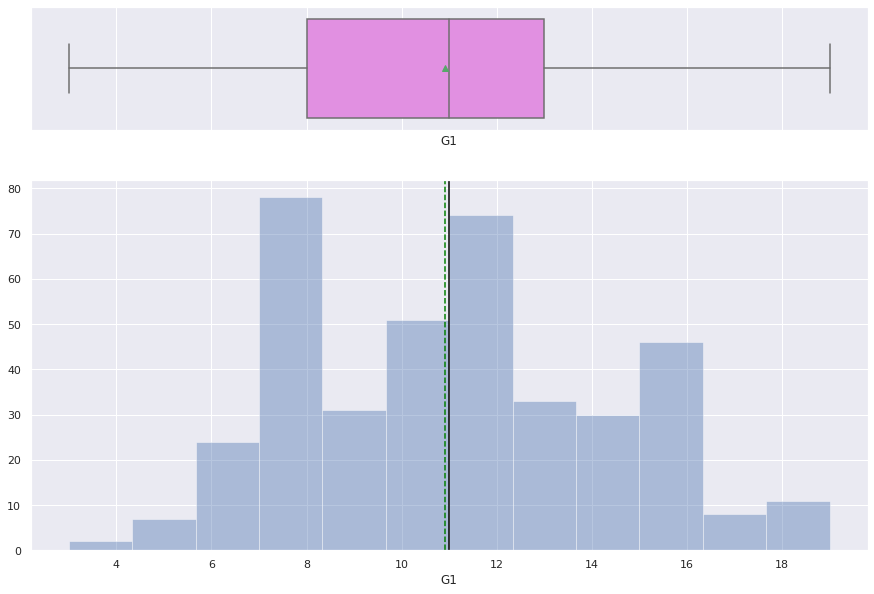

In [8]:
histogram_boxplot(df['G1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


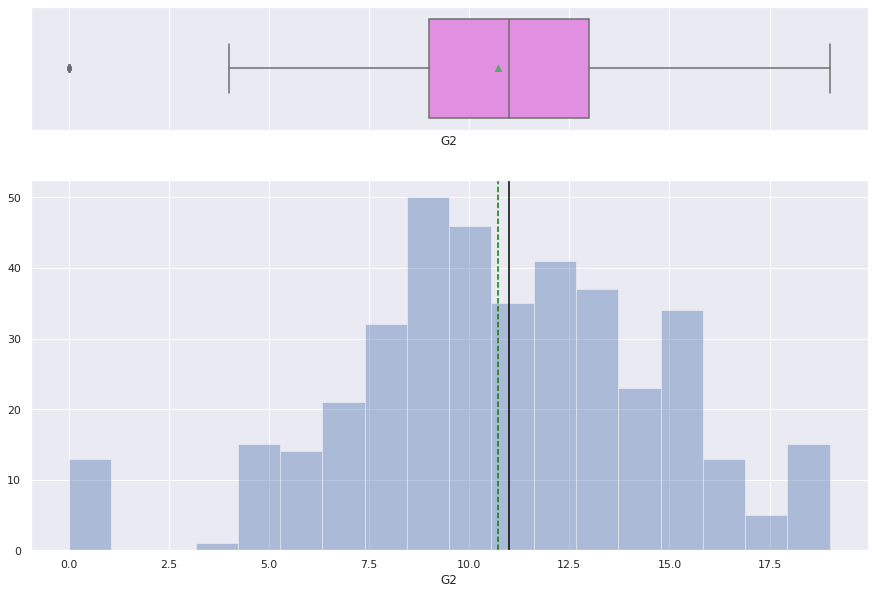

In [9]:
histogram_boxplot(df['G2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


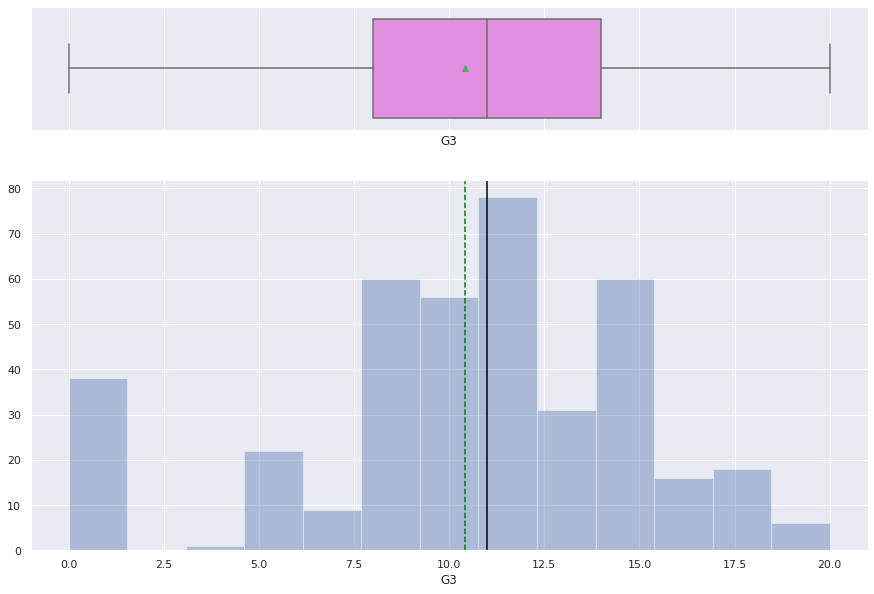

In [10]:
histogram_boxplot(df['G3'])

# Multivariate Analysis

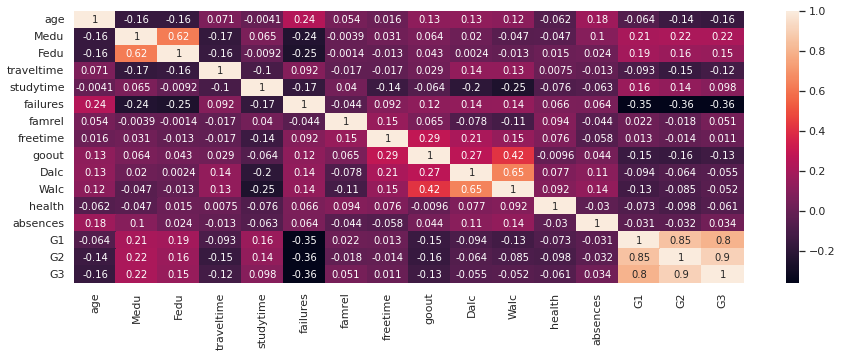

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Prepare for ML

In [12]:
# Check for missing values
df.isnull().sum()
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)})

,% of Missing Values
school,0.0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
Mjob,0.0
Fjob,0.0


In [13]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
col_dummy=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [16]:
y = df['G1']

In [17]:
X = df.drop(['G1'], axis=1, inplace = True)

In [18]:
X = df.drop(['G3'], axis=1, inplace = True)


In [19]:
X = df.drop(['G2'],axis=1, inplace = True)


In [20]:
#Creating a Dummy Variables and Dropping the First One
X = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [21]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

# If X_test is seperate and want to create a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1,
)

print(X_train.shape, X_val.shape, X_test.shape)

(296, 40) (99, 40) (119, 40)


In [23]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 296
Number of rows in test data = 119


# Model Performance Check

In [24]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [25]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3.840
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           4.27e-11
Time:                        01:13:09   Log-Likelihood:                -711.85
No. Observations:                 296   AIC:                             1504.
Df Residuals:                     256   BIC:                             1651.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.2497      3.77

In [26]:
#check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                507.598914
age                    1.917737
Medu                   3.155320
Fedu                   2.194230
traveltime             1.436327
studytime              1.387366
failures               1.447388
famrel                 1.154109
freetime               1.305352
goout                  1.624873
Dalc                   2.130990
Walc                   2.677054
health                 1.213421
absences               1.289002
school_MS              1.547580
sex_M                  1.562391
address_U              1.515578
famsize_LE3            1.225390
Pstatus_T              1.159146
Mjob_health            2.551605
Mjob_other             2.965900
Mjob_services          3.091237
Mjob_teacher           3.334352
Fjob_health            2.382890
Fjob_other             6.239769
Fjob_services          5.487942
Fjob_teacher           2.941851
reason_home            1.404600
reason_other           1.348591
reason_reputation      1.510615
guardian_mother        1.5

In [27]:

X_train2 = X_train.drop(["Fjob_other"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.367 
Adjusted R-squared: 0.273


In [28]:
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3.919
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           2.98e-11
Time:                        01:13:09   Log-Likelihood:                -712.37
No. Observations:                 296   AIC:                             1503.
Df Residuals:                     257   BIC:                             1647.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.4527      3.67

In [29]:
#Check for additional multicolinarity
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                482.419103
age                    1.910009
Medu                   3.153952
Fedu                   2.191828
traveltime             1.425561
studytime              1.386849
failures               1.444892
famrel                 1.150379
freetime               1.293239
goout                  1.624447
Dalc                   2.093839
Walc                   2.621622
health                 1.212521
absences               1.285426
school_MS              1.543753
sex_M                  1.546569
address_U              1.513656
famsize_LE3            1.224089
Pstatus_T              1.159105
Mjob_health            2.514484
Mjob_other             2.843155
Mjob_services          3.042878
Mjob_teacher           3.301809
Fjob_health            1.381260
Fjob_services          1.373990
Fjob_teacher           1.403074
reason_home            1.402266
reason_other           1.341213
reason_reputation      1.510128
guardian_mother        1.504234
guardian_other         1.7

In [30]:
#Removing the Variables with a P-value above .05
#The null hypothesis is that the coefficient of these variables is 0. The alternative hypothesis is the coefficients are a non-zero integer and therefore have an effect on Y.
#Code as used in Linear Regression
# initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'traveltime', 'studytime', 'failures', 'sex_M', 'Mjob_other', 'Mjob_teacher', 'Fjob_teacher', 'reason_reputation', 'schoolsup_yes', 'famsup_yes', 'higher_yes']


In [31]:
X_train2 = X_train2[selected_features]

In [32]:
olsmod11 = sm.OLS(y_train, X_train2).fit()
print(olsmod11.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     12.40
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           4.44e-19
Time:                        01:13:10   Log-Likelihood:                -721.98
No. Observations:                 296   AIC:                             1468.
Df Residuals:                     284   BIC:                             1512.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.2092      1.00